# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


# Exploratory Data Analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
dataset.iloc[:,2:len(dataset)].describe([0.01,0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
CreditScore,10000.0,650.528800,96.653299,350.00,432.0000,521.00,584.00,652.000,718.0000,850.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,21.0000,27.00,32.00,37.000,44.0000,72.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,0.0000,1.00,3.00,5.000,7.0000,10.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.0000,0.00,0.00,97198.540,127644.2400,185967.9854,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.0000,1.00,1.00,1.000,2.0000,3.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.0000,0.00,0.00,1.000,1.0000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.0000,0.00,0.00,1.000,1.0000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,1842.8253,20273.58,51002.11,100193.915,149388.2475,198069.7345,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.0000,0.00,0.00,0.000,0.0000,1.0000,1.00


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


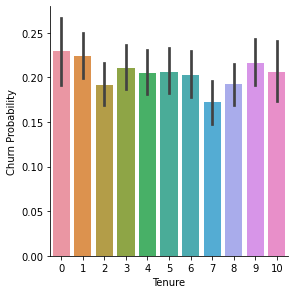

In [ ]:
g= sns.factorplot(x = "Tenure", y = "Exited", data = dataset, kind = "bar", size = 4)
g.set_ylabels("Churn Probability")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


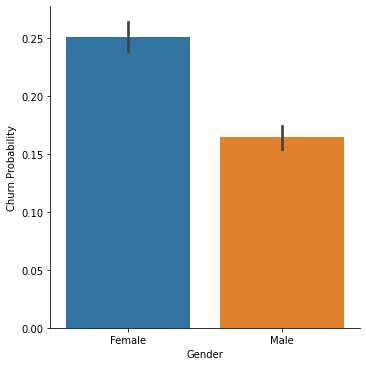

In [ ]:
g= sns.factorplot(x = "Gender", y = "Exited", data = dataset, kind = "bar", size = 5)
g.set_ylabels("Churn Probability")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


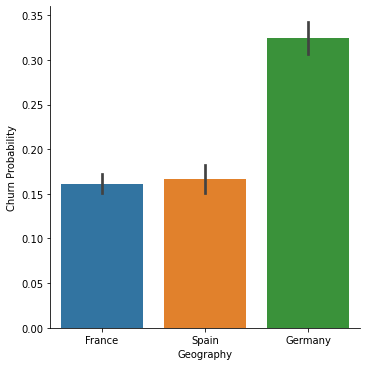

In [ ]:
g= sns.factorplot(x = "Geography", y = "Exited", data = dataset, kind = "bar", size = 5)
g.set_ylabels("Churn Probability")
plt.show()

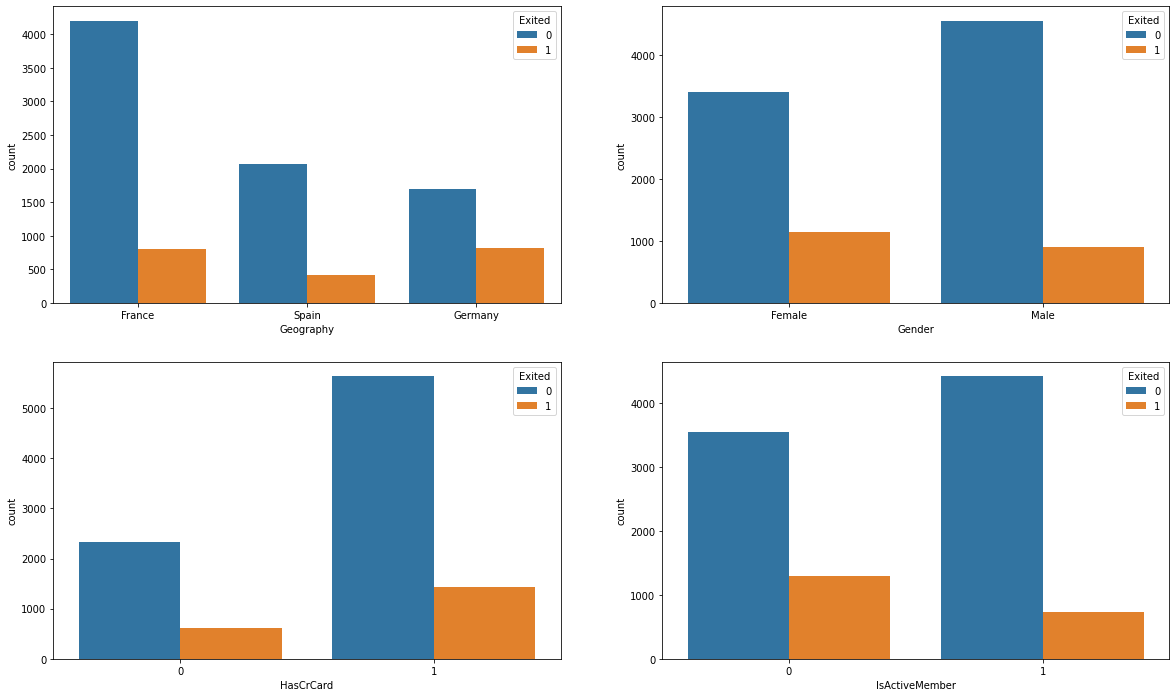

In [ ]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

We plot boxgraphs because we need to have information on the variability or dispersion of the data. A boxplot is a graph that gives you a good indication of how the values in the data are spread out.

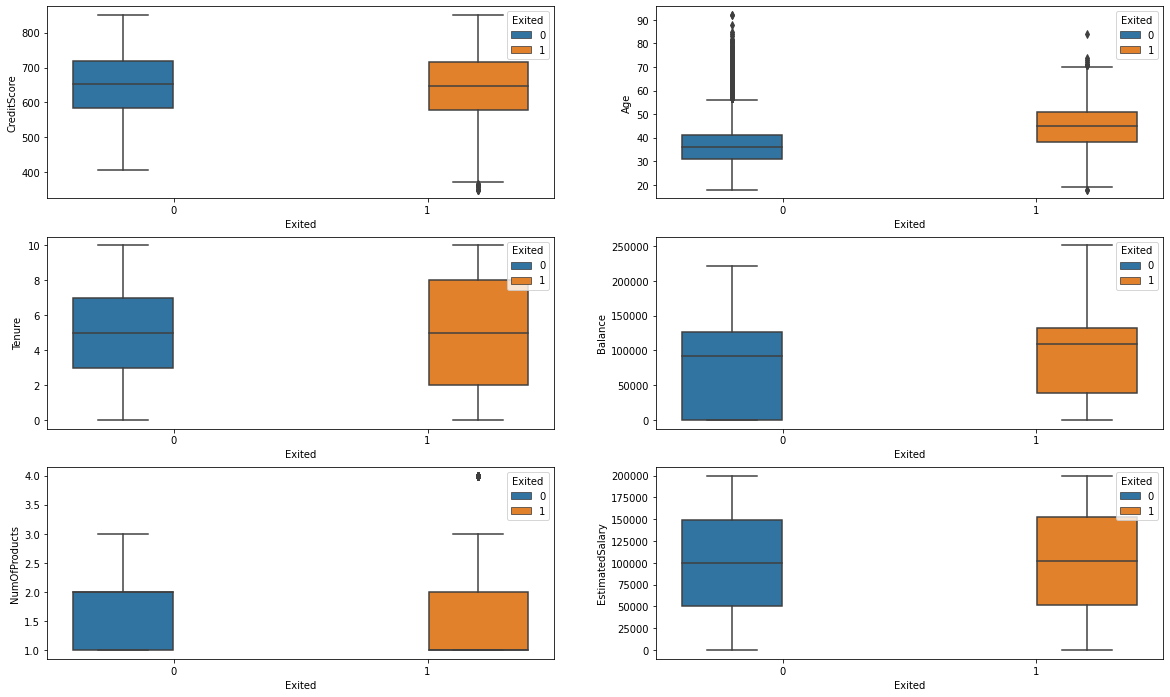

In [ ]:
 # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = dataset , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][1])

### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])


In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
dataset.iloc[:,2:len(dataset)].describe([0.01,0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
CreditScore,10000.0,650.528800,96.653299,350.00,432.0000,521.00,584.00,652.000,718.0000,850.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,21.0000,27.00,32.00,37.000,44.0000,72.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,0.0000,1.00,3.00,5.000,7.0000,10.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.0000,0.00,0.00,97198.540,127644.2400,185967.9854,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.0000,1.00,1.00,1.000,2.0000,3.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.0000,0.00,0.00,1.000,1.0000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.0000,0.00,0.00,1.000,1.0000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,1842.8253,20273.58,51002.11,100193.915,149388.2475,198069.7345,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.0000,0.00,0.00,0.000,0.0000,1.0000,1.00


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 996us/step - loss: 0.5023 - accuracy: 0.7884
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.7962
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4110 - accuracy: 0.7980
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8046
Epoch 8/100
250/250 [==============================] - 0s 985us/step - loss: 0.3866 - accuracy: 0.8121
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.8231
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3709 - ac

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1518   77]
 [ 208  197]]


0.8575